# US Income analysis

The dataset was taken from [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/Adult) and contains personal information with target income variable (<=50 K US dollars and > 50 K US dollars). Personal information is used to predict income level. 

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('adult1.csv', encoding='cp1252', header = None)
df.head(10)

0                  1       2              3   4                    5   \
0  25            Private  226802           11th   7        Never-married   
1  38            Private   89814        HS-grad   9   Married-civ-spouse   
2  28          Local-gov  336951     Assoc-acdm  12   Married-civ-spouse   
3  44            Private  160323   Some-college  10   Married-civ-spouse   
4  18                  ?  103497   Some-college  10        Never-married   
5  34            Private  198693           10th   6        Never-married   
6  29                  ?  227026        HS-grad   9        Never-married   
7  63   Self-emp-not-inc  104626    Prof-school  15   Married-civ-spouse   
8  24            Private  369667   Some-college  10        Never-married   
9  55            Private  104996        7th-8th   4   Married-civ-spouse   

                   6               7       8        9     10  11  12  \
0   Machine-op-inspct       Own-child   Black     Male     0   0  40   
1     Farming-fishing         Husband   White     Male     0   0  50   
2     Protective-serv         Husband   White     Male     0   0  40   
3   Machine-op-inspct         Husband   Black     Male  7688   0  40   
4                   ?       Own-child   White   Female     0   0  30   
5       Other-service   Not-in-family   White     Male     0   0  30   
6                   ?       Unmarried   Black     Male     0   0  40   
7      Prof-specialty         Husband   White     Male  3103   0  32   
8       Other-service       Unmarried   White   Female     0   0  40   
9        Craft-repair         Husband   White     Male     0   0  10   

               13       14  
0   United-States   <=50K.  
1   United-States   <=50K.  
2   United-States    >50K.  
3   United-States    >50K.  
4   United-States   <=50K.  
5   United-States   <=50K.  
6   United-States   <=50K.  
7   United-States    >50K.  
8   United-States   <=50K.  
9   United-States   <=50K.

In [3]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
          'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'Income_class']
df.columns = columns
df.head(10)

age          workclass  fnlwgt      education  education-num  \
0   25            Private  226802           11th              7   
1   38            Private   89814        HS-grad              9   
2   28          Local-gov  336951     Assoc-acdm             12   
3   44            Private  160323   Some-college             10   
4   18                  ?  103497   Some-college             10   
5   34            Private  198693           10th              6   
6   29                  ?  227026        HS-grad              9   
7   63   Self-emp-not-inc  104626    Prof-school             15   
8   24            Private  369667   Some-college             10   
9   55            Private  104996        7th-8th              4   

        marital-status          occupation    relationship    race      sex  \
0        Never-married   Machine-op-inspct       Own-child   Black     Male   
1   Married-civ-spouse     Farming-fishing         Husband   White     Male   
2   Married-civ-spouse     Protective-serv         Husband   White     Male   
3   Married-civ-spouse   Machine-op-inspct         Husband   Black     Male   
4        Never-married                   ?       Own-child   White   Female   
5        Never-married       Other-service   Not-in-family   White     Male   
6        Never-married                   ?       Unmarried   Black     Male   
7   Married-civ-spouse      Prof-specialty         Husband   White     Male   
8        Never-married       Other-service       Unmarried   White   Female   
9   Married-civ-spouse        Craft-repair         Husband   White     Male   

   capital-gain  capital-loss  hours-per-week  native-country Income_class  
0             0             0              40   United-States       <=50K.  
1             0             0              50   United-States       <=50K.  
2             0             0              40   United-States        >50K.  
3          7688             0              40   United-States        >50K.  
4             0             0              30   United-States       <=50K.  
5             0             0              30   United-States       <=50K.  
6             0             0              40   United-States       <=50K.  
7          3103             0              32   United-States        >50K.  
8             0             0              40   United-States       <=50K.  
9             0             0              10   United-States       <=50K.

In [4]:
df.to_csv('Income.csv', index=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16281 non-null  object
 14  Income_class    16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


df.info function provides us with information about non-null values. We see from the fucnction response that the dataset doesn't contain null values but df.head gives us a response that some object variables contain '?' value. It means that we need to check all object values. Lets try to handle the dataset by another method.   

In [6]:
df.replace(' ?', np.nan, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       15318 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      15315 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16007 non-null  object
 14  Income_class    16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [7]:
df.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
Income_class        0
dtype: int64

After we replaced '?' symbols by Nan values we have better understanding of the dataset. But it is better to study every object variable one by one to be confident that the dataset doesn't contain confusing values.

In [8]:
df.head()

age   workclass  fnlwgt      education  education-num       marital-status  \
0   25     Private  226802           11th              7        Never-married   
1   38     Private   89814        HS-grad              9   Married-civ-spouse   
2   28   Local-gov  336951     Assoc-acdm             12   Married-civ-spouse   
3   44     Private  160323   Some-college             10   Married-civ-spouse   
4   18         NaN  103497   Some-college             10        Never-married   

           occupation relationship    race      sex  capital-gain  \
0   Machine-op-inspct    Own-child   Black     Male             0   
1     Farming-fishing      Husband   White     Male             0   
2     Protective-serv      Husband   White     Male             0   
3   Machine-op-inspct      Husband   Black     Male          7688   
4                 NaN    Own-child   White   Female             0   

   capital-loss  hours-per-week  native-country Income_class  
0             0              40   United-States       <=50K.  
1             0              50   United-States       <=50K.  
2             0              40   United-States        >50K.  
3             0              40   United-States        >50K.  
4             0              30   United-States       <=50K.

The function with stipulated Na values doesn't want to mark '?' sign as null value. So lets analyze null values by value_counts function for all object variables separately one by one.

In [9]:
df.workclass.value_counts(normalize = True, dropna=False)

 Private             0.688533
 Self-emp-not-inc    0.081138
 Local-gov           0.064062
NaN                  0.059149
 State-gov           0.041951
 Self-emp-inc        0.035563
 Federal-gov         0.028991
 Without-pay         0.000430
 Never-worked        0.000184
Name: workclass, dtype: float64

worklass column contains 6 percent of null values.

In [10]:
df.education.value_counts(normalize = True, dropna=False)

 HS-grad         0.324489
 Some-college    0.220318
 Bachelors       0.163995
 Masters         0.057367
 Assoc-voc       0.041705
 11th            0.039125
 Assoc-acdm      0.032799
 10th            0.028008
 7th-8th         0.018979
 Prof-school     0.015847
 9th             0.014864
 12th            0.013758
 Doctorate       0.011117
 5th-6th         0.010810
 1st-4th         0.004852
 Preschool       0.001965
Name: education, dtype: float64

education column doesn't contain null values.

In [11]:
df['marital-status'].value_counts(normalize = True, dropna=False)

 Married-civ-spouse       0.454702
 Never-married            0.333763
 Divorced                 0.134513
 Widowed                  0.032246
 Separated                0.031018
 Married-spouse-absent    0.012898
 Married-AF-spouse        0.000860
Name: marital-status, dtype: float64

marital-status column doesn't contain null values.

In [12]:
df.occupation.value_counts(normalize = True, dropna=False)

 Prof-specialty       0.124808
 Exec-managerial      0.124071
 Craft-repair         0.123641
 Sales                0.113875
 Adm-clerical         0.113077
 Other-service        0.099994
 Machine-op-inspct    0.062650
NaN                   0.059333
 Transport-moving     0.046557
 Handlers-cleaners    0.043118
 Tech-support         0.031816
 Farming-fishing      0.030465
 Protective-serv      0.020515
 Priv-house-serv      0.005712
 Armed-Forces         0.000369
Name: occupation, dtype: float64

Occupation column contains about 6 percent of null values.

In [13]:
df.relationship.value_counts(normalize = True, dropna=False)

 Husband           0.400651
 Not-in-family     0.262760
 Own-child         0.154352
 Unmarried         0.103126
 Wife              0.046864
 Other-relative    0.032246
Name: relationship, dtype: float64

This column doesn't contain null values.

In [14]:
df.race.value_counts(normalize = True, dropna=False)

 White                 0.856581
 Black                 0.095879
 Asian-Pac-Islander    0.029482
 Amer-Indian-Eskimo    0.009766
 Other                 0.008292
Name: race, dtype: float64

This column doesn't contain null values.

In [15]:
df.sex.value_counts(normalize = True, dropna=False)

 Male      0.667035
 Female    0.332965
Name: sex, dtype: float64

We have two thirds of men and one third of women.

In [16]:
df['native-country'].value_counts(normalize = True, dropna=False)

 United-States                 0.900559
 Mexico                        0.018918
NaN                            0.016829
 Philippines                   0.005958
 Puerto-Rico                   0.004299
 Germany                       0.004238
 Canada                        0.003747
 India                         0.003132
 El-Salvador                   0.003010
 China                         0.002887
 Cuba                          0.002641
 England                       0.002273
 South                         0.002150
 Dominican-Republic            0.002027
 Italy                         0.001965
 Haiti                         0.001904
 Portugal                      0.001843
 Japan                         0.001843
 Poland                        0.001658
 Columbia                      0.001597
 Jamaica                       0.001536
 Guatemala                     0.001474
 Greece                        0.001228
 Vietnam                       0.001167
 Ecuador                       0.001044


About 1.6 percent of native country data is missing.

In [17]:
df['Income_class'].value_counts(normalize = True, dropna=False)

 <=50K.    0.763774
 >50K.     0.236226
Name: Income_class, dtype: float64

The dataset doesn't contain null values in our target column. It's very good!

### Description of EDA:

1. Dataset has 16281 entries and big quantity of object variables that should be encoded by one-hot way and ordinal way.
2. I haven't found any description for fnlwgt parameter (final weight?). I suppose it's better remove it from the dataset for my analysis.
3. 3 columns contain null variables. Due to the dataset contain many entries (16281) and less than 6 percent of null entries for every stipulated column as well as wide range possibble values for every column( of workclass column (8) unique values, occupation (14) unique values and native country - more than 20 unique values) I suppose It would be correct way to remove strings with NaN values before analysis performing.
4. Education column is already ordinal encoded. Education-num column is the encoded education column.

In [18]:
df.head(10)

age          workclass  fnlwgt      education  education-num  \
0   25            Private  226802           11th              7   
1   38            Private   89814        HS-grad              9   
2   28          Local-gov  336951     Assoc-acdm             12   
3   44            Private  160323   Some-college             10   
4   18                NaN  103497   Some-college             10   
5   34            Private  198693           10th              6   
6   29                NaN  227026        HS-grad              9   
7   63   Self-emp-not-inc  104626    Prof-school             15   
8   24            Private  369667   Some-college             10   
9   55            Private  104996        7th-8th              4   

        marital-status          occupation    relationship    race      sex  \
0        Never-married   Machine-op-inspct       Own-child   Black     Male   
1   Married-civ-spouse     Farming-fishing         Husband   White     Male   
2   Married-civ-spouse     Protective-serv         Husband   White     Male   
3   Married-civ-spouse   Machine-op-inspct         Husband   Black     Male   
4        Never-married                 NaN       Own-child   White   Female   
5        Never-married       Other-service   Not-in-family   White     Male   
6        Never-married                 NaN       Unmarried   Black     Male   
7   Married-civ-spouse      Prof-specialty         Husband   White     Male   
8        Never-married       Other-service       Unmarried   White   Female   
9   Married-civ-spouse        Craft-repair         Husband   White     Male   

   capital-gain  capital-loss  hours-per-week  native-country Income_class  
0             0             0              40   United-States       <=50K.  
1             0             0              50   United-States       <=50K.  
2             0             0              40   United-States        >50K.  
3          7688             0              40   United-States        >50K.  
4             0             0              30   United-States       <=50K.  
5             0             0              30   United-States       <=50K.  
6             0             0              40   United-States       <=50K.  
7          3103             0              32   United-States        >50K.  
8             0             0              40   United-States       <=50K.  
9             0             0              10   United-States       <=50K.

In [19]:
data = df.dropna(axis = 0)
data.reset_index(inplace=True)
data.head(10)

index  age          workclass  fnlwgt      education  education-num  \
0      0   25            Private  226802           11th              7   
1      1   38            Private   89814        HS-grad              9   
2      2   28          Local-gov  336951     Assoc-acdm             12   
3      3   44            Private  160323   Some-college             10   
4      5   34            Private  198693           10th              6   
5      7   63   Self-emp-not-inc  104626    Prof-school             15   
6      8   24            Private  369667   Some-college             10   
7      9   55            Private  104996        7th-8th              4   
8     10   65            Private  184454        HS-grad              9   
9     11   36        Federal-gov  212465      Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married   Machine-op-inspct       Own-child   Black     Male   
1   Married-civ-spouse     Farming-fishing         Husband   White     Male   
2   Married-civ-spouse     Protective-serv         Husband   White     Male   
3   Married-civ-spouse   Machine-op-inspct         Husband   Black     Male   
4        Never-married       Other-service   Not-in-family   White     Male   
5   Married-civ-spouse      Prof-specialty         Husband   White     Male   
6        Never-married       Other-service       Unmarried   White   Female   
7   Married-civ-spouse        Craft-repair         Husband   White     Male   
8   Married-civ-spouse   Machine-op-inspct         Husband   White     Male   
9   Married-civ-spouse        Adm-clerical         Husband   White     Male   

   capital-gain  capital-loss  hours-per-week  native-country Income_class  
0             0             0              40   United-States       <=50K.  
1             0             0              50   United-States       <=50K.  
2             0             0              40   United-States        >50K.  
3          7688             0              40   United-States        >50K.  
4             0             0              30   United-States       <=50K.  
5          3103             0              32   United-States        >50K.  
6             0             0              40   United-States       <=50K.  
7             0             0              10   United-States       <=50K.  
8          6418             0              40   United-States        >50K.  
9             0             0              40   United-States       <=50K.

In [20]:
data.drop('index', axis = 1, inplace = True)
data.head(10)

C:\Users\PNarnov\AppData\Local\Temp\ipykernel_5832\1110836713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('index', axis = 1, inplace = True)


age          workclass  fnlwgt      education  education-num  \
0   25            Private  226802           11th              7   
1   38            Private   89814        HS-grad              9   
2   28          Local-gov  336951     Assoc-acdm             12   
3   44            Private  160323   Some-college             10   
4   34            Private  198693           10th              6   
5   63   Self-emp-not-inc  104626    Prof-school             15   
6   24            Private  369667   Some-college             10   
7   55            Private  104996        7th-8th              4   
8   65            Private  184454        HS-grad              9   
9   36        Federal-gov  212465      Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married   Machine-op-inspct       Own-child   Black     Male   
1   Married-civ-spouse     Farming-fishing         Husband   White     Male   
2   Married-civ-spouse     Protective-serv         Husband   White     Male   
3   Married-civ-spouse   Machine-op-inspct         Husband   Black     Male   
4        Never-married       Other-service   Not-in-family   White     Male   
5   Married-civ-spouse      Prof-specialty         Husband   White     Male   
6        Never-married       Other-service       Unmarried   White   Female   
7   Married-civ-spouse        Craft-repair         Husband   White     Male   
8   Married-civ-spouse   Machine-op-inspct         Husband   White     Male   
9   Married-civ-spouse        Adm-clerical         Husband   White     Male   

   capital-gain  capital-loss  hours-per-week  native-country Income_class  
0             0             0              40   United-States       <=50K.  
1             0             0              50   United-States       <=50K.  
2             0             0              40   United-States        >50K.  
3          7688             0              40   United-States        >50K.  
4             0             0              30   United-States       <=50K.  
5          3103             0              32   United-States        >50K.  
6             0             0              40   United-States       <=50K.  
7             0             0              10   United-States       <=50K.  
8          6418             0              40   United-States        >50K.  
9             0             0              40   United-States       <=50K.

In [21]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income_class      0
dtype: int64

In [22]:
data.notna().sum()

age               15060
workclass         15060
fnlwgt            15060
education         15060
education-num     15060
marital-status    15060
occupation        15060
relationship      15060
race              15060
sex               15060
capital-gain      15060
capital-loss      15060
hours-per-week    15060
native-country    15060
Income_class      15060
dtype: int64

Every column contains 15060 enries without null values!       
Now the dataset is ready for feature engineerning step.

In [23]:
data.to_csv('Income.csv', index=False)

In [24]:
data.Income_class.value_counts(normalize = True)

 <=50K.    0.754316
 >50K.     0.245684
Name: Income_class, dtype: float64

Proportions are very similar to the value_counts() result that was before data cleaning.

In [25]:
data.Income_class.replace(' <=50K.', 0, inplace = True)
data.Income_class.replace(' >50K.', 1, inplace = True)
data.Income_class.value_counts(normalize = True)

C:\Users\PNarnov\AppData\Local\Temp\ipykernel_5832\3342320123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Income_class.replace(' <=50K.', 0, inplace = True)
C:\Users\PNarnov\AppData\Local\Temp\ipykernel_5832\3342320123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Income_class.replace(' >50K.', 1, inplace = True)


0    0.754316
1    0.245684
Name: Income_class, dtype: float64

In [26]:
data.head(10)

age          workclass  fnlwgt      education  education-num  \
0   25            Private  226802           11th              7   
1   38            Private   89814        HS-grad              9   
2   28          Local-gov  336951     Assoc-acdm             12   
3   44            Private  160323   Some-college             10   
4   34            Private  198693           10th              6   
5   63   Self-emp-not-inc  104626    Prof-school             15   
6   24            Private  369667   Some-college             10   
7   55            Private  104996        7th-8th              4   
8   65            Private  184454        HS-grad              9   
9   36        Federal-gov  212465      Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married   Machine-op-inspct       Own-child   Black     Male   
1   Married-civ-spouse     Farming-fishing         Husband   White     Male   
2   Married-civ-spouse     Protective-serv         Husband   White     Male   
3   Married-civ-spouse   Machine-op-inspct         Husband   Black     Male   
4        Never-married       Other-service   Not-in-family   White     Male   
5   Married-civ-spouse      Prof-specialty         Husband   White     Male   
6        Never-married       Other-service       Unmarried   White   Female   
7   Married-civ-spouse        Craft-repair         Husband   White     Male   
8   Married-civ-spouse   Machine-op-inspct         Husband   White     Male   
9   Married-civ-spouse        Adm-clerical         Husband   White     Male   

   capital-gain  capital-loss  hours-per-week  native-country  Income_class  
0             0             0              40   United-States             0  
1             0             0              50   United-States             0  
2             0             0              40   United-States             1  
3          7688             0              40   United-States             1  
4             0             0              30   United-States             0  
5          3103             0              32   United-States             1  
6             0             0              40   United-States             0  
7             0             0              10   United-States             0  
8          6418             0              40   United-States             1  
9             0             0              40   United-States             0

In [27]:
data.drop('fnlwgt', axis = 1, inplace = True)
data.head(10)

C:\Users\PNarnov\AppData\Local\Temp\ipykernel_5832\2022699102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('fnlwgt', axis = 1, inplace = True)


age          workclass      education  education-num       marital-status  \
0   25            Private           11th              7        Never-married   
1   38            Private        HS-grad              9   Married-civ-spouse   
2   28          Local-gov     Assoc-acdm             12   Married-civ-spouse   
3   44            Private   Some-college             10   Married-civ-spouse   
4   34            Private           10th              6        Never-married   
5   63   Self-emp-not-inc    Prof-school             15   Married-civ-spouse   
6   24            Private   Some-college             10        Never-married   
7   55            Private        7th-8th              4   Married-civ-spouse   
8   65            Private        HS-grad              9   Married-civ-spouse   
9   36        Federal-gov      Bachelors             13   Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0   Machine-op-inspct       Own-child   Black     Male             0   
1     Farming-fishing         Husband   White     Male             0   
2     Protective-serv         Husband   White     Male             0   
3   Machine-op-inspct         Husband   Black     Male          7688   
4       Other-service   Not-in-family   White     Male             0   
5      Prof-specialty         Husband   White     Male          3103   
6       Other-service       Unmarried   White   Female             0   
7        Craft-repair         Husband   White     Male             0   
8   Machine-op-inspct         Husband   White     Male          6418   
9        Adm-clerical         Husband   White     Male             0   

   capital-loss  hours-per-week  native-country  Income_class  
0             0              40   United-States             0  
1             0              50   United-States             0  
2             0              40   United-States             1  
3             0              40   United-States             1  
4             0              30   United-States             0  
5             0              32   United-States             1  
6             0              40   United-States             0  
7             0              10   United-States             0  
8             0              40   United-States             1  
9             0              40   United-States             0

In [28]:
data['education-num'].value_counts(normalize = True)

9     0.328220
10    0.213878
13    0.167729
14    0.058898
11    0.043293
7     0.037915
12    0.033134
6     0.026760
4     0.017663
15    0.016135
5     0.014675
8     0.013280
16    0.011222
3     0.010691
2     0.004714
1     0.001793
Name: education-num, dtype: float64

In [29]:
data['education'].value_counts(normalize = True)

 HS-grad         0.328220
 Some-college    0.213878
 Bachelors       0.167729
 Masters         0.058898
 Assoc-voc       0.043293
 11th            0.037915
 Assoc-acdm      0.033134
 10th            0.026760
 7th-8th         0.017663
 Prof-school     0.016135
 9th             0.014675
 12th            0.013280
 Doctorate       0.011222
 5th-6th         0.010691
 1st-4th         0.004714
 Preschool       0.001793
Name: education, dtype: float64

We see that education-num column is the ordinal encoded education column so it's possible drop the education column for futher analysis.

In [30]:
data.drop('education', axis = 1, inplace = True)

C:\Users\PNarnov\AppData\Local\Temp\ipykernel_5832\1598208237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('education', axis = 1, inplace = True)


In [31]:
data.head(10)

age          workclass  education-num       marital-status  \
0   25            Private              7        Never-married   
1   38            Private              9   Married-civ-spouse   
2   28          Local-gov             12   Married-civ-spouse   
3   44            Private             10   Married-civ-spouse   
4   34            Private              6        Never-married   
5   63   Self-emp-not-inc             15   Married-civ-spouse   
6   24            Private             10        Never-married   
7   55            Private              4   Married-civ-spouse   
8   65            Private              9   Married-civ-spouse   
9   36        Federal-gov             13   Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0   Machine-op-inspct       Own-child   Black     Male             0   
1     Farming-fishing         Husband   White     Male             0   
2     Protective-serv         Husband   White     Male             0   
3   Machine-op-inspct         Husband   Black     Male          7688   
4       Other-service   Not-in-family   White     Male             0   
5      Prof-specialty         Husband   White     Male          3103   
6       Other-service       Unmarried   White   Female             0   
7        Craft-repair         Husband   White     Male             0   
8   Machine-op-inspct         Husband   White     Male          6418   
9        Adm-clerical         Husband   White     Male             0   

   capital-loss  hours-per-week  native-country  Income_class  
0             0              40   United-States             0  
1             0              50   United-States             0  
2             0              40   United-States             1  
3             0              40   United-States             1  
4             0              30   United-States             0  
5             0              32   United-States             1  
6             0              40   United-States             0  
7             0              10   United-States             0  
8             0              40   United-States             1  
9             0              40   United-States             0

Futher it is necessary to remove duplicates.

In [32]:
data.duplicated().value_counts()

False    14130
True       930
dtype: int64

We see that the dataset contains duplicated samples. It is possible that in such big dataset with general personal parameters duplicated data may be. I suppose it is better to remove all duplicates before modelling step. 

In [33]:
data.drop_duplicates(inplace = True)
data.duplicated().value_counts()

C:\Users\PNarnov\AppData\Local\Temp\ipykernel_5832\2525100010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace = True)


False    14130
dtype: int64

In [34]:
data.Income_class.value_counts(normalize = True)

0    0.751592
1    0.248408
Name: Income_class, dtype: float64

The proportion of the target variables sutes us. We can continue data handling.

In [35]:
data.shape

(14130, 13)

In [36]:
set(data.duplicated())

{False}

Duplicates analysis shows us that now we don't have them. Now we can perform one-hot encoding of object variables.

In [37]:
data.to_csv('IncomeForDT_cleaned.csv', index = False)

In [38]:
data_object = data.select_dtypes(include = 'object')
data_object

workclass       marital-status          occupation    relationship  \
0            Private        Never-married   Machine-op-inspct       Own-child   
1            Private   Married-civ-spouse     Farming-fishing         Husband   
2          Local-gov   Married-civ-spouse     Protective-serv         Husband   
3            Private   Married-civ-spouse   Machine-op-inspct         Husband   
4            Private        Never-married       Other-service   Not-in-family   
...              ...                  ...                 ...             ...   
15055        Private        Never-married      Prof-specialty       Own-child   
15056        Private             Divorced      Prof-specialty   Not-in-family   
15057        Private   Married-civ-spouse      Prof-specialty         Husband   
15058        Private             Divorced        Adm-clerical       Own-child   
15059   Self-emp-inc   Married-civ-spouse     Exec-managerial         Husband   

                      race      sex  native-country  
0                    Black     Male   United-States  
1                    White     Male   United-States  
2                    White     Male   United-States  
3                    Black     Male   United-States  
4                    White     Male   United-States  
...                    ...      ...             ...  
15055                White     Male   United-States  
15056                White   Female   United-States  
15057                White     Male   United-States  
15058   Asian-Pac-Islander     Male   United-States  
15059                White     Male   United-States  

[14130 rows x 7 columns]

In [39]:
data

age      workclass  education-num       marital-status  \
0       25        Private              7        Never-married   
1       38        Private              9   Married-civ-spouse   
2       28      Local-gov             12   Married-civ-spouse   
3       44        Private             10   Married-civ-spouse   
4       34        Private              6        Never-married   
...    ...            ...            ...                  ...   
15055   33        Private             13        Never-married   
15056   39        Private             13             Divorced   
15057   38        Private             13   Married-civ-spouse   
15058   44        Private             13             Divorced   
15059   35   Self-emp-inc             13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0       Machine-op-inspct       Own-child                Black     Male   
1         Farming-fishing         Husband                White     Male   
2         Protective-serv         Husband                White     Male   
3       Machine-op-inspct         Husband                Black     Male   
4           Other-service   Not-in-family                White     Male   
...                   ...             ...                  ...      ...   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15057      Prof-specialty         Husband                White     Male   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capital-gain  capital-loss  hours-per-week  native-country  \
0                 0             0              40   United-States   
1                 0             0              50   United-States   
2                 0             0              40   United-States   
3              7688             0              40   United-States   
4                 0             0              30   United-States   
...             ...           ...             ...             ...   
15055             0             0              40   United-States   
15056             0             0              36   United-States   
15057             0             0              50   United-States   
15058          5455             0              40   United-States   
15059             0             0              60   United-States   

       Income_class  
0                 0  
1                 0  
2                 1  
3                 1  
4                 0  
...             ...  
15055             0  
15056             0  
15057             0  
15058             0  
15059             1  

[14130 rows x 13 columns]

In [40]:
data_dummies = pd.get_dummies(data_object)
data_dummies

workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                           0                     0                   1   
1                           0                     0                   1   
2                           0                     1                   0   
3                           0                     0                   1   
4                           0                     0                   1   
...                       ...                   ...                 ...   
15055                       0                     0                   1   
15056                       0                     0                   1   
15057                       0                     0                   1   
15058                       0                     0                   1   
15059                       0                     0                   0   

       workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   
...                        ...                          ...   
15055                        0                            0   
15056                        0                            0   
15057                        0                            0   
15058                        0                            0   
15059                        1                            0   

       workclass_ State-gov  workclass_ Without-pay  marital-status_ Divorced  \
0                         0                       0                         0   
1                         0                       0                         0   
2                         0                       0                         0   
3                         0                       0                         0   
4                         0                       0                         0   
...                     ...                     ...                       ...   
15055                     0                       0                         0   
15056                     0                       0                         1   
15057                     0                       0                         0   
15058                     0                       0                         1   
15059                     0                       0                         0   

       marital-status_ Married-AF-spouse  marital-status_ Married-civ-spouse  \
0                                      0                                   0   
1                                      0                                   1   
2                                      0                                   1   
3                                      0                                   1   
4                                      0                                   0   
...                                  ...                                 ...   
15055                                  0                                   0   
15056                                  0                                   0   
15057                                  0                                   1   
15058                                  0                                   0   
15059                                  0                                   1   

       ...  native-country_ Portugal  native-country_ Puerto-Rico  \
0      ...                         0                            0   
1      ...                         0                            0   
2      ...                         0                            0   
3      ...                         0                            0   
4      ...                         0                            0   
.

In [41]:
#sample.reset_index(inplace = True)
#sample_dummies.reset_index(inplace = True)
data = pd.concat([data, data_dummies], axis = 1)
data.drop(['workclass', 'marital-status', 'occupation', 'relationship',
           'race', 'sex', 'native-country'] , axis = 1, inplace = True)

data.head()

age  education-num  capital-gain  capital-loss  hours-per-week  \
0   25              7             0             0              40   
1   38              9             0             0              50   
2   28             12             0             0              40   
3   44             10          7688             0              40   
4   34              6             0             0              30   

   Income_class  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             1                       0                     1   
3             1                       0                     0   
4             0                       0                     0   

   workclass_ Private  workclass_ Self-emp-inc  ...  native-country_ Portugal  \
0                   1                        0  ...                         0   
1                   1                        0  ...                         0   
2                   0                        0  ...                         0   
3                   1                        0  ...                         0   
4                   1                        0  ...                         0   

   native-country_ Puerto-Rico  native-country_ Scotland  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   

   native-country_ South  native-country_ Taiwan  native-country_ Thailand  \
0                      0                       0                         0   
1                      0                       0                         0   
2                      0                       0                         0   
3                      0                       0                         0   
4                      0                       0                         0   

   native-country_ Trinadad&Tobago  native-country_ United-States  \
0                                0                              1   
1                                0                              1   
2                                0                              1   
3                                0                              1   
4                                0                              1   

   native-country_ Vietnam  native-country_ Yugoslavia  
0                        0                           0  
1                        0                           0  
2                        0                           0  
3                        0                           0  
4                        0                           0  

[5 rows x 87 columns]

In [42]:
data.shape

(14130, 87)

In [43]:
data.to_csv('IncomeForDT_cleaned.csv', index = False)

# Modelling

Now the dataset is ready for modelling.   
Lets find Decision tree classifier with the best parameters to create the best predictive model.

Importing of the libraries:

In [44]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier as DTree
from sklearn.tree import ExtraTreeClassifier as ExtraTree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix as plotCM
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

Firstly I would like to fit general Dtree classifier with default parameters and see how it will perform.

In [62]:
X = data.drop('Income_class', axis = 1)
y = data['Income_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 72800, stratify = y)
print('Training stratification by y:')
print(y_train.value_counts(normalize = True))
print('Testing stratification by y:')
print(y_test.value_counts(normalize = True))

Training stratification by y:
0    0.751628
1    0.248372
Name: Income_class, dtype: float64
Testing stratification by y:
0    0.751486
1    0.248514
Name: Income_class, dtype: float64


In [70]:
tree = DTree()
tree = tree.fit(X_train, y_train)
y_hat = tree.predict(X_test)
print('Default accuracy results:')
print(accuracy_score(y_test, y_hat))
print(' ')
print('Default classification report:')
print(classification_report(y_test, y_hat))
print(' ')
print('Default f1 score:')
print(f1_score(y_test, y_hat))

Default accuracy results:
0.7925275969431078
 
Default classification report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2655
           1       0.58      0.59      0.59       878

    accuracy                           0.79      3533
   macro avg       0.72      0.72      0.72      3533
weighted avg       0.79      0.79      0.79      3533

 
Default f1 score:
0.5856416054267948


In [71]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

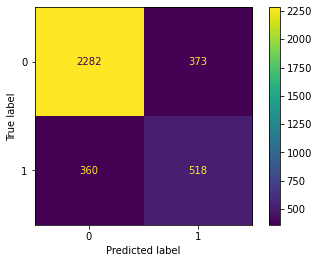

In [72]:
plotCM(tree, X_test, y_test)

In [73]:
roc_auc_score(y_test, y_hat)

0.7247437893860812

The results of DTree with defalt setting look poor.   
It is necessary to find hyperparameters which may improve the model perfomance. 

In [74]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [75]:
tree.get_depth()

53

In [76]:
tree.get_n_leaves()

2056

depth = 53 looks to be very big. Probably our tree is overfitted and has very high varience. We also see that the dataset has imbalanced so it's possible to change class weights (to find the best class weights for the model).

Lets get the best estimator for the dataset. It's possible to find it using GridSearchCV.

### Looking for the model with the best hyperparameters

Best CV f1 score: 0.6765092420804302
 
Best CV params: {'class_weight': {0: 0.35, 1: 0.65}, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 8}
 
Accuracy results for test dataset:
0.8075290121709595
 
Classification report for test dataset:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      2655
           1       0.58      0.82      0.68       878

    accuracy                           0.81      3533
   macro avg       0.76      0.81      0.77      3533
weighted avg       0.84      0.81      0.82      3533

 
f1 score for test dataset:
0.6804511278195489
 
Confusion matrix for test dataset:
 
roc_auc score for test dataset:
0.8132423029569857


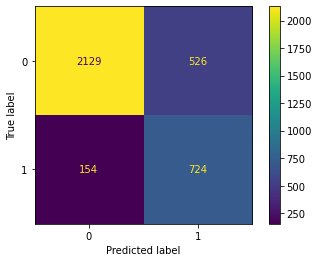

In [77]:
from sklearn.model_selection import StratifiedKFold
SKfold = StratifiedKFold(n_splits = 4,  shuffle = True, random_state = 12345)

estimator = DTree()
params = {
    'class_weight' : [
        {0 : 1, 1 : 1}, {0 : 0.45, 1 : 0.55}, {0 : 0.4, 1 : 0.6}, 
        {0 : 0.35, 1 : 0.65}, {0 : 0.3, 1 : 0.7}, {0 : 0.25, 1 : 0.75}
    ],
    'criterion':['gini', 'entropy'],
    'max_depth':[5, 10, 15, 20, 25, 30, 35, 40],
    'min_samples_leaf':[4, 8, 10, 12, 15, 20],
         }

search = GridSearchCV(estimator = estimator, param_grid = params, scoring = 'f1', cv = SKfold)
search = search.fit(X_train, y_train)

print('Best CV f1 score:', search.best_score_)
print(' ')
print('Best CV params:', search.best_params_)
print(' ')

y_hat = search.best_estimator_.predict(X_test)
print('Accuracy results for test dataset:')
print(accuracy_score(y_test, y_hat))
print(' ')
print('Classification report for test dataset:')
print(classification_report(y_test, y_hat))
print(' ')
print('f1 score for test dataset:')
print(f1_score(y_test, y_hat))
print(' ')
print('Confusion matrix for test dataset:')
plotCM(search.best_estimator_, X_test, y_test)
print(' ')
print('roc_auc score for test dataset:')
print(roc_auc_score(y_test, y_hat))

We got the best hyperparameters including the class weights which ballance the model and can improve it further using ensemble methods.   
We see that rebalance of class weigths improved recall for class 1 (from 0.59 to 0.82) with f1 score for the class 1. But the model gives us much more wrong positive results decreasing recall for the zero class. It means that the model has the ability to predict class 1 much better than default tree but the ability to predict zero class correctly has been decreased.

Lets visualize the tree.

In [78]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

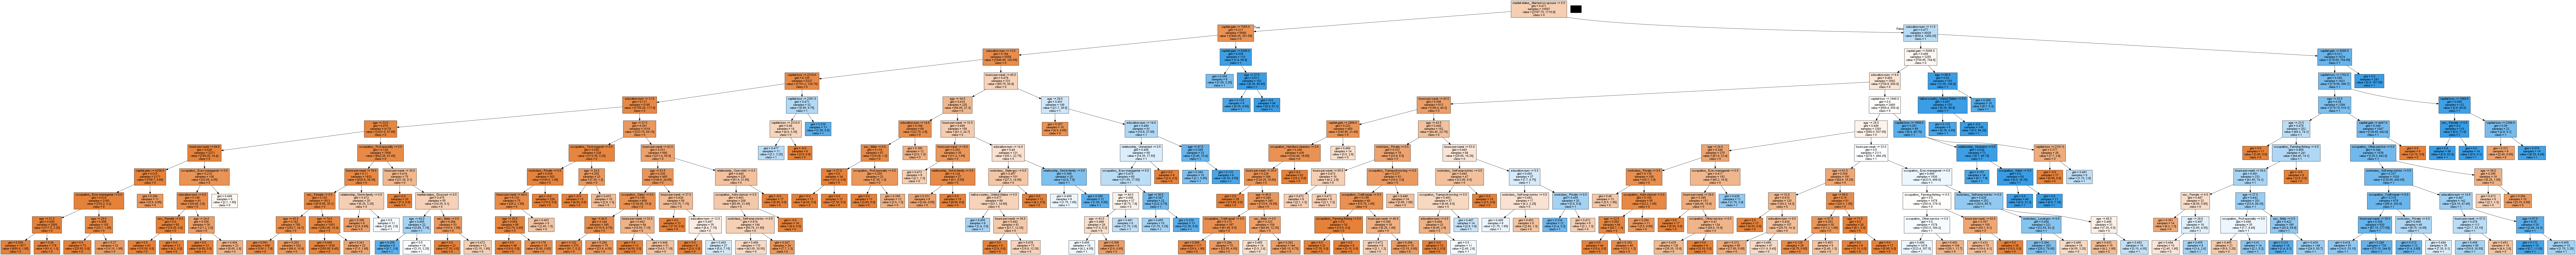

In [79]:
feature_names = X.columns.values
dot_data = StringIO()

export_graphviz(search.best_estimator_, out_file=dot_data, filled=True, 
                feature_names = feature_names, class_names = ['0','1'], proportion = False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# View the tree image
filename = 'census_tree_with_weights.png'
graph.write_png(filename)
Image(filename=filename) 

The max depth of the tree is only 10 nodes means that the tree is not overfitted and it's better for both tasks: class prection as well as model interpretation. 

Lets try to find the best model without stipulating the classes weights and check how the entire tree will look like.

### Looking for the best model (w/o weights)

Best CV accuracy: 0.8458995918716212
 
Best CV params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20}
 
Accuracy results for test dataset:
0.8567789414095669
 
Classification report for test dataset:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2655
           1       0.80      0.57      0.66       878

    accuracy                           0.86      3533
   macro avg       0.83      0.76      0.79      3533
weighted avg       0.85      0.86      0.85      3533

 
f1 score for test dataset:
0.6631158455392809
 
Confusion matrix for test dataset:
 
roc_auc score for test dataset:
0.7598702752789468


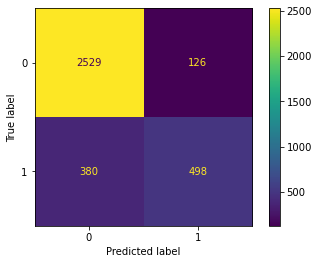

In [80]:
estimator = DTree()
params = {
    #'class_weight' : [{0 : 0.5, 1 : 0.5}, {0 : 0.45, 1 : 0.55}, {0 : 0.4, 1 : 0.6}, {0 : 0.35, 1 : 0.65}, {0 : 0.3, 1 : 0.7}],
    'criterion':['gini', 'entropy'],
    'max_depth':[5, 10, 15, 20, 25, 30, 35, 40],
    'min_samples_leaf':[4, 8, 10, 12, 15, 20]
         }

search2 = GridSearchCV(estimator = estimator, param_grid = params, scoring = 'accuracy', cv = SKfold)
search2 = search2.fit(X_train, y_train)

print('Best CV accuracy:', search2.best_score_)
print(' ')
print('Best CV params:', search2.best_params_)
print(' ')

y_hat = search2.best_estimator_.predict(X_test)
print('Accuracy results for test dataset:')
print(accuracy_score(y_test, y_hat))
print(' ')
print('Classification report for test dataset:')
print(classification_report(y_test, y_hat))
print(' ')
print('f1 score for test dataset:')
print(f1_score(y_test, y_hat))
print(' ')
print('Confusion matrix for test dataset:')
plotCM(search2.best_estimator_, X_test, y_test)
print(' ')
print('roc_auc score for test dataset:')
print(roc_auc_score(y_test, y_hat))

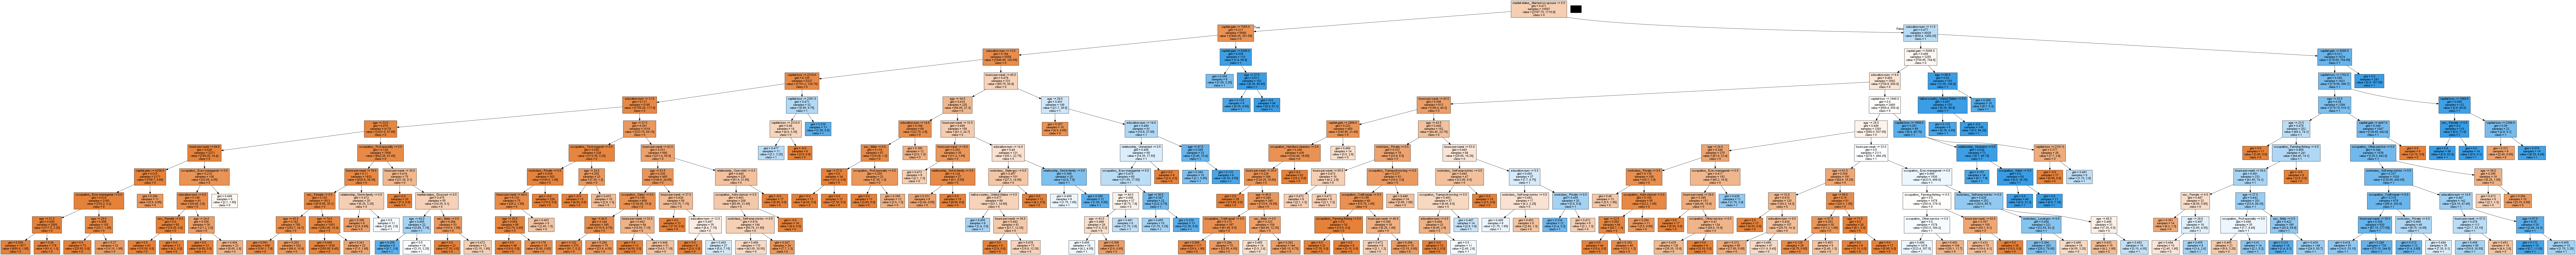

In [81]:
feature_names = X.columns.values
dot_data = StringIO()

export_graphviz(search.best_estimator_, out_file=dot_data, filled=True, 
                feature_names = feature_names, class_names = ['0','1'], proportion = False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# View the tree image
filename = 'census_tree_WO_weights.png'
graph.write_png(filename)
Image(filename=filename) 

Now we have 2 different models for the entire dataset.   
The first model is better to predict the class 1 results. The second one is better for the zero class predicting.
From the both trees We see that insightful factors are: marital status, education, capital gain, capital loss, age, working hours.   
Lets try ensemble methods to get better model.

One of the main thing is that the first tree (with weights) has lower accuracy but higher roc_auc_score result. It means that the first model is better in correct class 1 predicting! 

In [82]:
data.to_csv('Income_cleaned_transformed_ED.csv', index = False)

## Ensemble methods

Lets try ensemble methods to improve the model:

For the begining it's insteresting to check how bagging classifier will handle default decision tree.   

In [84]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_predict

n_estimators = [10, 30, 50, 70, 100, 125, 150]
scores = {}
model = DTree()
for estimators in n_estimators:
    Bag1 = BaggingClassifier(base_estimator = model, n_estimators = estimators, max_samples = 0.8)
    y_pred = cross_val_predict(Bag1, X = X_train, y = y_train, cv = SKfold)
    print(f1_score(y_train, y_pred))
    scores[estimators] = float(f1_score(y_train, y_pred))
print(scores)

0.6148395164651939
0.6277789108708954
0.630483574780657
0.6273404469498691
0.6389620920332454
0.6354501607717041
0.6357214934409687
{10: 0.6148395164651939, 30: 0.6277789108708954, 50: 0.630483574780657, 70: 0.6273404469498691, 100: 0.6389620920332454, 125: 0.6354501607717041, 150: 0.6357214934409687}


<AxesSubplot:>

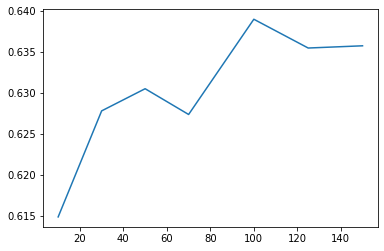

In [85]:
import seaborn as sns
sns.lineplot(x = scores.keys(), y = scores.values())

We see that when we add more trees to the ensemble the f1 score result is getting higher.   
It looks like 100 trees is enough quantity for this ensemble model. We also see that f1 score for the ensemble of default trees is better then  for the single tree (0.64 vs 0.59).   
Lets look at classification report and other parameters:

Accuracy results for test dataset:
0.8347013869232947
 
Classification report for test dataset:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2655
           1       0.70      0.59      0.64       878

    accuracy                           0.83      3533
   macro avg       0.78      0.75      0.77      3533
weighted avg       0.83      0.83      0.83      3533

 
f1 score for test dataset:
0.6412776412776412
 
Confusion matrix for test dataset:
 
roc_auc score for test dataset:
0.7543286616990335


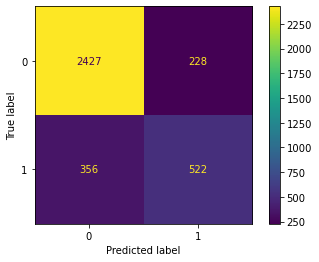

In [87]:
n_estimators = 100
model = DTree()
Bag1 = BaggingClassifier(base_estimator = model, n_estimators = estimators, max_samples = 0.8)
Bag1.fit(X_train, y_train)
y_hat = Bag1.predict(X_test)

print('Accuracy results for test dataset:')
print(accuracy_score(y_test, y_hat))
print(' ')
print('Classification report for test dataset:')
print(classification_report(y_test, y_hat))
print(' ')
print('f1 score for test dataset:')
print(f1_score(y_test, y_hat))
print(' ')
print('Confusion matrix for test dataset:')
plotCM(Bag1, X_test, y_test)
print(' ')
print('roc_auc score for test dataset:')
print(roc_auc_score(y_test, y_hat))

We can compare the results of default single tree with the results of the ensemble from such default trees:

|Parameter|Default tree|Bagging 100 trees|
|---------|------------|-----------------|
|Accuracy|0.792|0.834|
|F1 score|0.585|0.64|
|ROC-AUC score|0.724|0.754|

Using bagging we could improve all parameters of the single model but confusion matrix and classification report shows us that we mostly improved ability to predict the 0 class. Lets check can we improve these results of default model even better using Random Forest classifier?

0.6067981535879143
0.6209016393442622
0.6241776315789473
0.6241776315789473
0.6288280930992242
0.6289102433040278
0.626792298238427


<AxesSubplot:>

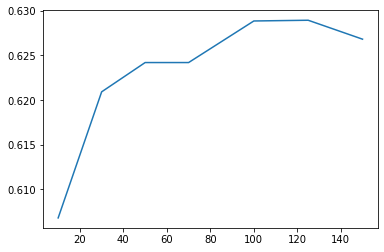

In [88]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [10, 30, 50, 70, 100, 125, 150]
scores = {}

for estimators in n_estimators:
    RF1 = RandomForestClassifier(n_estimators = estimators, warm_start = True)
    y_pred = cross_val_predict(RF1, X = X_train, y = y_train, cv = SKfold)
    print(f1_score(y_train, y_pred))
    scores[estimators] = float(f1_score(y_train, y_pred))

sns.lineplot(x = scores.keys(), y = scores.values())

For the RF classifier 100 default trees is enough.   
Lets create an optimal classifier with 100 trees and compare the results with Bag1 classifier.

Accuracy results for test dataset:
0.8301726577979055
 
Classification report for test dataset:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2655
           1       0.69      0.57      0.63       878

    accuracy                           0.83      3533
   macro avg       0.78      0.74      0.76      3533
weighted avg       0.82      0.83      0.82      3533

 
f1 score for test dataset:
0.626865671641791
 
Confusion matrix for test dataset:
 
roc_auc score for test dataset:
0.7444547400572264


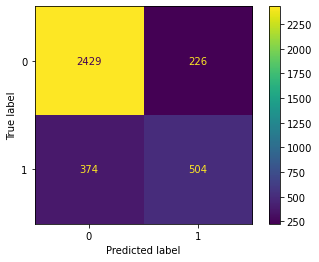

In [91]:
n_estimators = 100
RF1 = RandomForestClassifier(n_estimators = n_estimators, warm_start = True)
RF1.fit(X_train, y_train)
y_hat = RF1.predict(X_test)

print('Accuracy results for test dataset:')
print(accuracy_score(y_test, y_hat))
print(' ')
print('Classification report for test dataset:')
print(classification_report(y_test, y_hat))
print(' ')
print('f1 score for test dataset:')
print(f1_score(y_test, y_hat))
print(' ')
print('Confusion matrix for test dataset:')
plotCM(RF1, X_test, y_test)
print(' ')
print('roc_auc score for test dataset:')
print(roc_auc_score(y_test, y_hat))

## Results of the default models:

|Parameter|Default tree|Bagging 100 trees|RF 100 trees|
|---------|------------|-----------------|------------|
|Accuracy|0.792|0.834|0.83|
|F1 score|0.585|0.64|0.626|
|ROC-AUC score|0.724|0.754|0.744|

Bagging showed the best predicting results for the default tree parameters.   
Lets try to improve our model which had the best parameters to predict class 1 results.

The best model which is able to predict class 1 result has following hyperparameters:   
Best CV params: {'class_weight': {0: 0.35, 1: 0.65}, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 8}

1. Lets find the best Bagging estimator:

0.6886206896551724
0.6944207473127453
0.6934569809376611
0.6959505833905284
0.6921084441374545
0.6948453608247424


<AxesSubplot:>

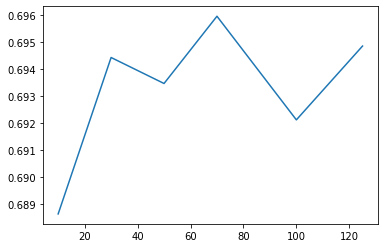

In [92]:
n_estimators = [10, 30, 50, 70, 100, 125]
scores = {}
model = DTree(class_weight = {0 : 0.35, 1 : 0.65}, 
              criterion = 'gini', max_depth = 10, min_samples_leaf = 8)
for estimators in n_estimators:
    Bag2 = BaggingClassifier(base_estimator = model, n_estimators = estimators, max_samples = 0.8)
    y_pred = cross_val_predict(Bag2, X = X_train, y = y_train, cv = SKfold)
    print(f1_score(y_train, y_pred))
    scores[estimators] = float(f1_score(y_train, y_pred))

sns.lineplot(x = scores.keys(), y = scores.values())

Beacouse our initial single tree is optimized we see very low model improvement results but it will be interesting to look at the results:

Pruned tree is looking to be a better variant for the dataset.
Lets analyze how it will predict the test set:

Accuracy results for test dataset:
0.8406453439003679
 
Classification report for test dataset:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2655
           1       0.65      0.78      0.71       878

    accuracy                           0.84      3533
   macro avg       0.79      0.82      0.80      3533
weighted avg       0.85      0.84      0.85      3533

 
f1 score for test dataset:
0.7090439276485788
 
Confusion matrix for test dataset:
 
roc_auc score for test dataset:
0.8207924189971215


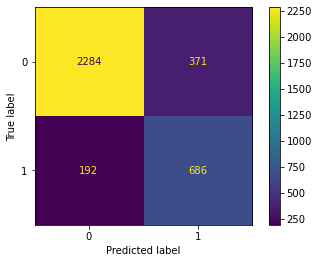

In [95]:
estimator = DTree(class_weight = {0 : 0.35, 1 : 0.65}, 
              criterion = 'gini', max_depth = 10, min_samples_leaf = 8)

Bag2 = BaggingClassifier(base_estimator = estimator, n_estimators = 80, max_samples = 0.8)
Bag2.fit(X_train, y_train)
y_hat = Bag2.predict(X_test)

print('Accuracy results for test dataset:')
print(accuracy_score(y_test, y_hat))
print(' ')
print('Classification report for test dataset:')
print(classification_report(y_test, y_hat))
print(' ')
print('f1 score for test dataset:')
print(f1_score(y_test, y_hat))
print(' ')
print('Confusion matrix for test dataset:')
plotCM(Bag2, X_test, y_test)
print(' ')
print('roc_auc score for test dataset:')
print(roc_auc_score(y_test, y_hat))

Lets perform the same for RF classifier and compare the results:

0.6747910863509748
0.6882827243094869
0.6889723455104131
0.6879217273954117
0.6865570435667062
0.6840412929429683
0.6875537958340505


<AxesSubplot:>

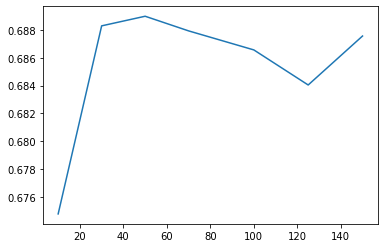

In [96]:
n_estimators = [10, 30, 50, 70, 100, 125, 150]
scores = {}

for estimators in n_estimators:
    RF1 = RandomForestClassifier(n_estimators = estimators, warm_start = True, 
                                 class_weight = {0 : 0.35, 1 : 0.65}, 
                                 criterion = 'gini', 
                                 max_depth = 10, min_samples_leaf = 8)
    y_pred = cross_val_predict(RF1, X = X_train, y = y_train, cv = SKfold)
    print(f1_score(y_train, y_pred))
    scores[estimators] = float(f1_score(y_train, y_pred))

sns.lineplot(x = scores.keys(), y = scores.values())

Accuracy results for test dataset:
0.8366827059156524
 
Classification report for test dataset:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      2655
           1       0.65      0.76      0.70       878

    accuracy                           0.84      3533
   macro avg       0.78      0.81      0.79      3533
weighted avg       0.85      0.84      0.84      3533

 
f1 score for test dataset:
0.696794534944824
 
Confusion matrix for test dataset:
 
roc_auc score for test dataset:
0.8093893843652539


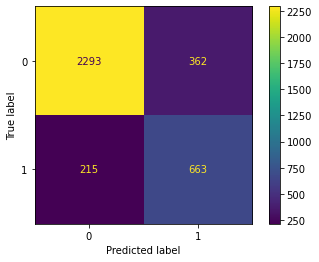

In [97]:
n_estimators = 60
RF2 = RandomForestClassifier(n_estimators = n_estimators, warm_start = True, 
                             class_weight = {0 : 0.35, 1 : 0.65}, 
                             criterion = 'gini', 
                             max_depth = 10, min_samples_leaf = 8)
RF2.fit(X_train, y_train)
y_hat = RF2.predict(X_test)

print('Accuracy results for test dataset:')
print(accuracy_score(y_test, y_hat))
print(' ')
print('Classification report for test dataset:')
print(classification_report(y_test, y_hat))
print(' ')
print('f1 score for test dataset:')
print(f1_score(y_test, y_hat))
print(' ')
print('Confusion matrix for test dataset:')
plotCM(RF2, X_test, y_test)
print(' ')
print('roc_auc score for test dataset:')
print(roc_auc_score(y_test, y_hat))

## Results of the optimized models:

|Parameter|Default tree|Bagging 80 trees|RF 60 trees|
|---------|------------|-----------------|------------|
|Accuracy|0.808        |            0.841|      0.837|
|F1 score|0.68        |            0.709|      0.697|
|ROC-AUC score|0.813|         0.821|            0.809|

Now have all results in one table.   
We see that for our optimized model as well as for the default model Bagging has the best modelling results.  
We may use Bag with 80 trees for feature estimation in futher steps.

# Feature estimation

Lets estimate the most impactful features of our Bagging model which showed the best result.

We see that we got different tree parameters but with very similar f1 value. For parameter estimation it's better to use model with less quantity of parameters beacouse such models have higher interpretability.

## Model interpretation:

The model to interpret:

In [98]:
from sklearn.inspection import permutation_importance

feature_importances= permutation_importance(Bag2, X = X_test, y = y_test, scoring = 'f1', 
                                            n_repeats = 5, random_state = 72523, max_samples = 1.0)

In [100]:
feature_importances.importances.shape

(86, 5)

In [101]:
feature_importances.importances_mean

array([ 5.03776703e-02,  6.56701707e-02,  6.36434415e-02,  8.82770767e-03,
        1.52940949e-02,  0.00000000e+00, -3.06287731e-04,  8.01042391e-04,
        0.00000000e+00,  2.56697578e-03, -1.46724041e-04,  0.00000000e+00,
       -4.40020392e-04,  0.00000000e+00,  2.00530743e-01,  0.00000000e+00,
       -9.73811192e-04,  0.00000000e+00,  7.32483396e-05,  4.66954261e-05,
        0.00000000e+00, -5.46996250e-04,  2.70886620e-03,  3.80649824e-03,
       -2.20048129e-04, -8.27008016e-04,  1.15377523e-02,  0.00000000e+00,
        4.53963536e-04, -2.93296351e-04, -2.40813472e-04, -2.66726461e-04,
       -6.20155039e-04,  5.12501011e-04,  2.24801463e-03, -7.33240877e-05,
        0.00000000e+00,  6.01770574e-05, -1.33363231e-04,  0.00000000e+00,
        0.00000000e+00, -7.66803214e-04,  0.00000000e+00,  5.33777432e-04,
       -5.60236481e-04, -1.28665086e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [102]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [103]:
def visualize_feature_importance(importance_array):
    # Sort the array based on mean value
    sorted_idx = importance_array.importances_mean.argsort()
    # Visualize the feature importances using boxplot
    fig, ax = plt.subplots()
    fig.set_figwidth(20)
    fig.set_figheight(12)
    fig.tight_layout()
    ax.boxplot(importance_array.importances[sorted_idx].T,
               vert=False, labels=X_train.columns[sorted_idx])
    ax.set_title("Permutation Importances (test set)")
    plt.show()

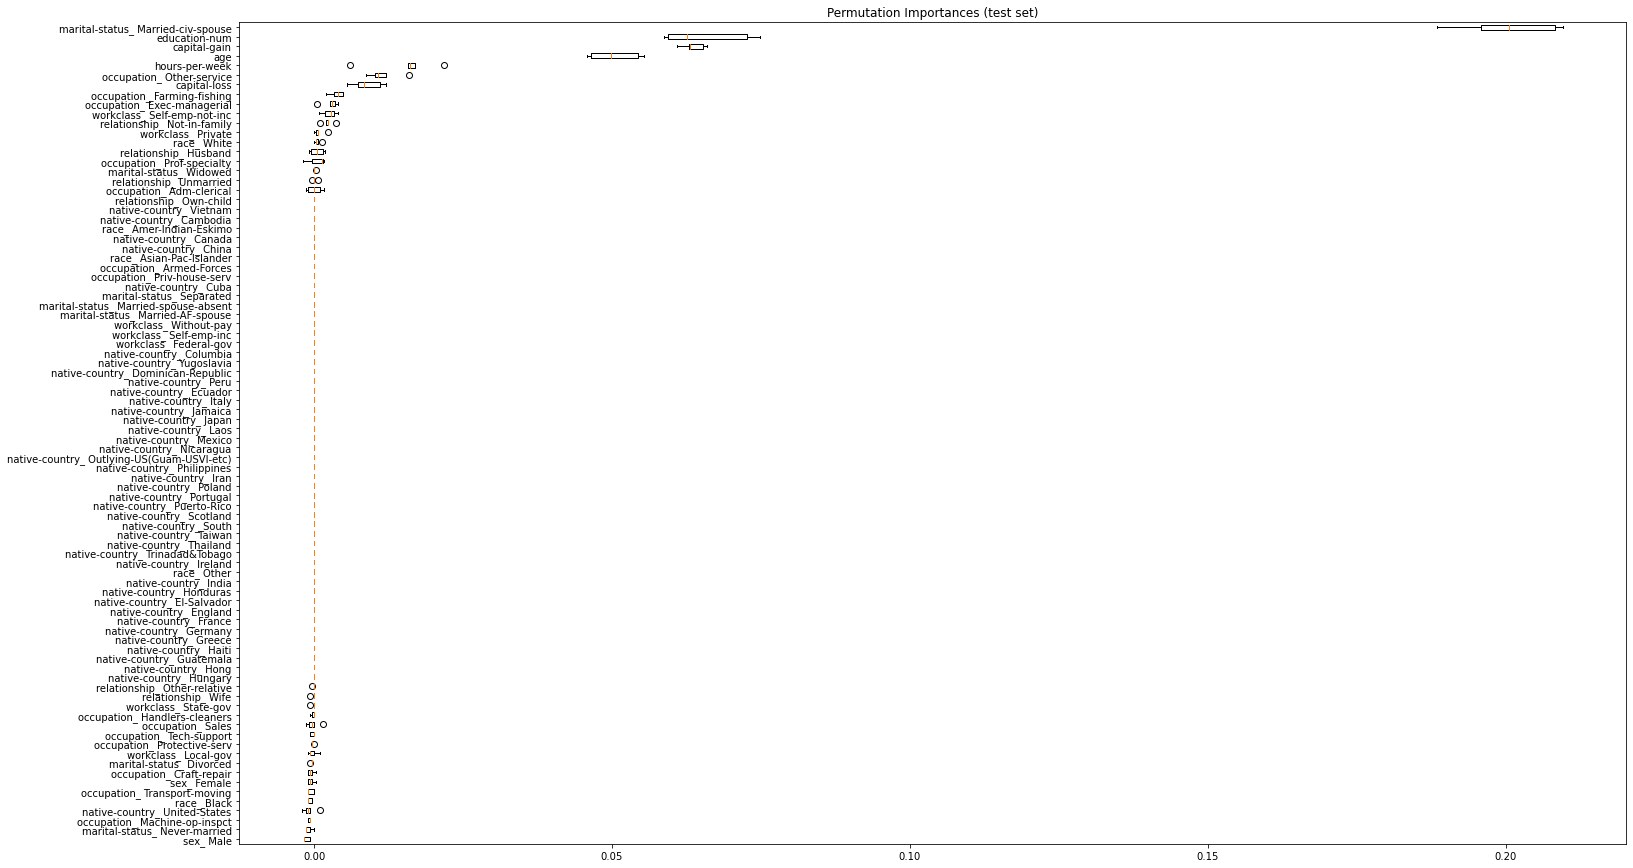

In [104]:
visualize_feature_importance(feature_importances)

We have to much information on our boxplot but it is possible to easy detect the most influential factors. They are similar to the factors which I deducted after single tree modelling.   
These parameters are:   
1. marital_status telling about if person has a spouse or not. If person has a spouse then he(she) probably has income over 50k. Bagging ensemble deducted this factor as the most impactful.
2. Next 3 parametrs are: education-num, capital-gain, age. In visualization of single trees these 3 parameters take place very often repeatedly as well as hours-per-week parameter that has the 5th place in this model interpretation.   

## PDP
Lets create partial dependency plot for several variables to see their influence.

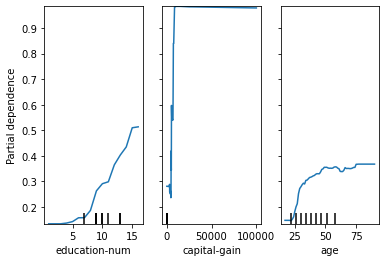

In [105]:
from sklearn.inspection import plot_partial_dependence

features = ['education-num', 'capital-gain', 'age',] #'marital-status_ Never-married']

plot_partial_dependence(estimator = Bag2, X = X_test, features = features, random_state = 123, 
                        n_cols = 3, grid_resolution = 100, percentiles=(0.05, 0.95))

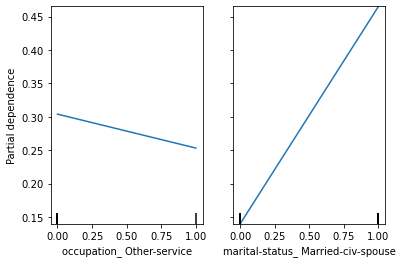

In [110]:
features = ['occupation_ Other-service', 'marital-status_ Married-civ-spouse']

plot_partial_dependence(estimator = Bag2, X = X_test, features = features, random_state = 123, 
                        n_cols = 2, grid_resolution = 100, percentiles=(0.05, 0.95))

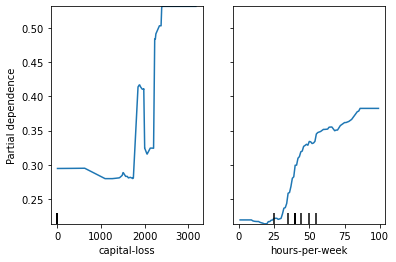

In [111]:
features = ['capital-loss', 'hours-per-week']

plot_partial_dependence(estimator = Bag2, X = X_test, features = features, random_state = 123, 
                        n_cols = 2, grid_resolution = 100, percentiles=(0.05, 0.95))

The plots confirm results of Decision tree classifier and Bag2.

# Results

1. The task of the analysis was to find the best predictive model for the census dataset and to interpret it.
2. The best prediction model is the bagging ebsemble of 80 regularized trees with modified weights for the class 1 predicting.
3. The most impactful parameters are marital status, education level, capital gain, age, working hours. 

### Tree classifier modelling results:

Several models were fitted and estimated in this notebook to find the best. The essential point was to find parameters which may help to predict class 1 results better - this point was in classes weight.   
1. The first model in this notebook is tree classifier with default parameters. It has good ability to predict zero class results (0.86 f1 score for zero class) but poor ability to predict class 1 with only 0.59 f1 score. This tree needs to be regularized and to get better class prediction balance.
2. Futher this notebook contains 2 pruned models. The first model has rebalanced class weights and it has higher ability to predict class 1 results but it also has many false positive results. The second model doesn't have rebalanced classes. It has higher accuracy result but the ability to predict of class 1 is worse and we see many false negative results.
3. I suppose that regularized model with rebalanced class weights is better for the current dataset analysis due to the fact that it gives us better understanding of personal features describing a reason of having high income (roc-auc score reflects this ability to predict class 1 more effectively. 

### Ensemble modelling results:

Two method were applied for 2 single tree classifiers - bagging and random forest.
1. Bagging and RF help improved prediction results of the both models. Bagging classifier has higher f1, roc-auc score and accuracy as we see it from the results.
2. The first model which was improved is the default tree classifier with low f1 score. Bagging and RF help us to predict better class 0 but the ability of these ensembles to predict class 1 is still the same (see classification report of these models).
3. The second model to improve is the regularized model with reballanced weights. These ensemble methods help to improve recall-precision model balance and they both have better ability to distinguish zero class from class one. This operation helps to improve f1 score for class 1 and to improve ROC-AUC score.
4. The best classifier which we have got is the bagging ensemle of 80 regularized trees with reballanced weights.

### Interpretation results:

Model interpretation boxplot shows that the parameters which we often see in decision tree nodes (mostly in its upper part) are essintial parameters which lead to perform proper decision making.